In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
df = pd.read_csv('../data/train.csv')

In [89]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [90]:
df.shape

(103904, 25)

In [91]:
df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [92]:
df = df.drop(columns=['Unnamed: 0','id'], axis=1)

In [93]:
df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [94]:
df.shape

(103904, 23)

In [95]:
df['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

In [96]:
df['target'] = df['satisfaction'].apply(lambda x :1 if x =='satisfied' else 0)

In [97]:
df['target'].value_counts()

target
0    58879
1    45025
Name: count, dtype: int64

In [98]:
df = df.drop('satisfaction', axis=1)

# Handling null values

In [99]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(np.mean(df['Arrival Delay in Minutes']),)

In [100]:
df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
target                               0
dtype: int64

In [101]:
x = df.drop('target', axis=1)
y = df['target']

In [103]:
x.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

In [104]:
x_num = x.select_dtypes(exclude='object')
x_cat = x.select_dtypes(include='object')

In [112]:
x_cat.Class.value_counts()

Class
Business    49665
Eco         46745
Eco Plus     7494
Name: count, dtype: int64

In [114]:
x_num

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0
103900,49,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0
103901,30,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0
103902,22,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0


In [86]:
x_cat

,Gender,Customer Type,Type of Travel,Class
0,Male,Loyal Customer,Personal Travel,Eco Plus
1,Male,disloyal Customer,Business travel,Business
2,Female,Loyal Customer,Business travel,Business
3,Female,Loyal Customer,Business travel,Business
4,Male,Loyal Customer,Business travel,Business
...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco
103900,Male,Loyal Customer,Business travel,Business
103901,Male,disloyal Customer,Business travel,Business
103902,Female,disloyal Customer,Business travel,Eco


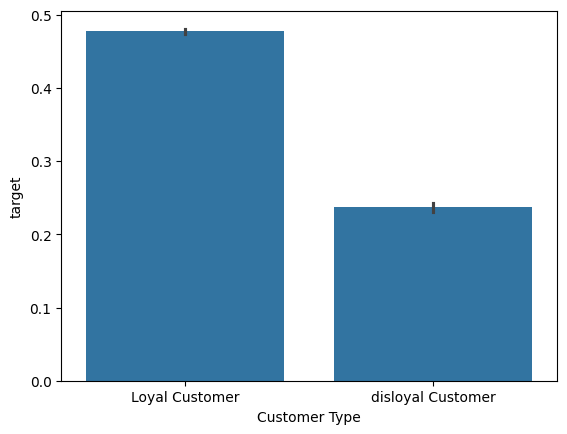

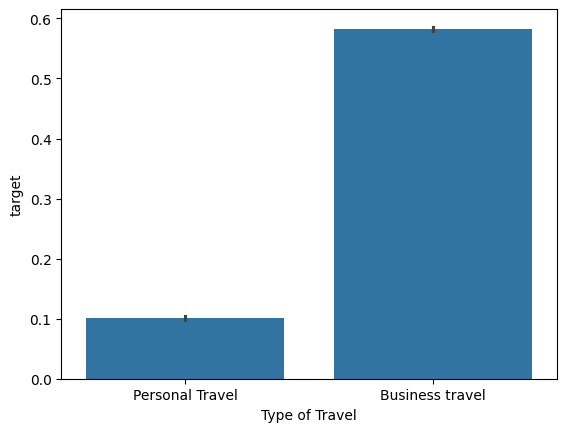

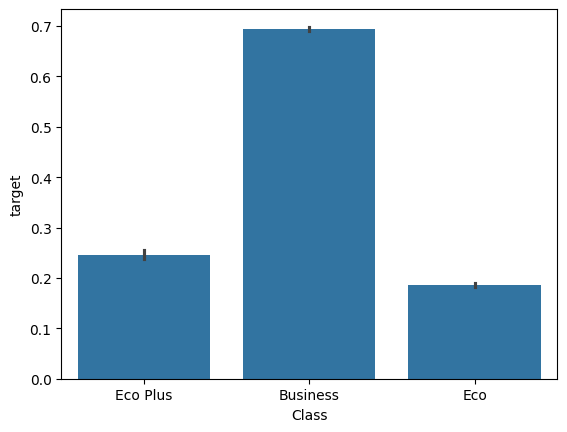

In [22]:
for i in x_cat:
    plt.figure()
    sns.barplot(x=x_cat[i],y=y)
    plt.show()

In [25]:
from sklearn.preprocessing import OneHotEncoder

ot = OneHotEncoder()

In [26]:
new=ot.fit_transform(x_cat)

In [27]:
x_cat_new = pd.get_dummies(x_cat, drop_first=True)

In [28]:
x_cat_new

,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,False,True,False,True
1,True,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
103899,True,False,True,False
103900,False,False,False,False
103901,True,False,False,False
103902,True,False,True,False


<Axes: >

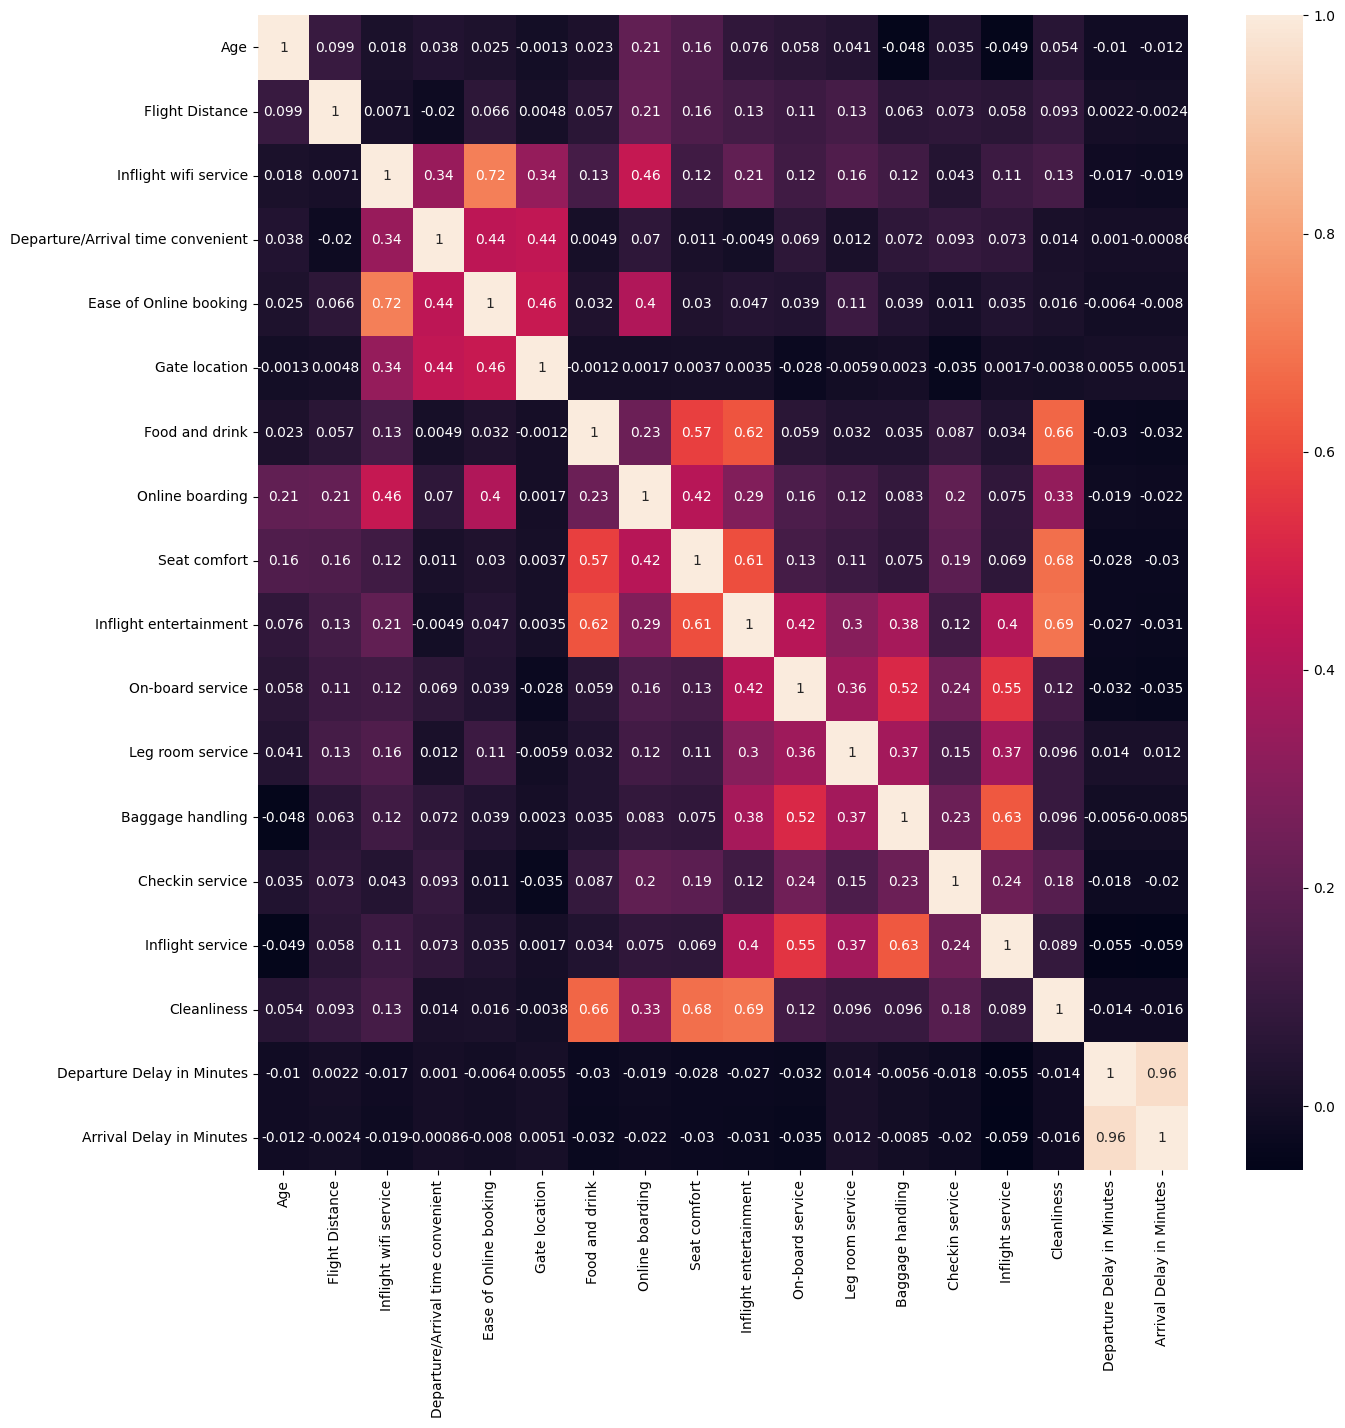

In [29]:
plt.figure(figsize=[15,15])
sns.heatmap(x_num.corr(), annot=True)

/var/folders/q5/4sgcvsds2rzbyzzy1kb4hgb00000gn/T/ipykernel_2624/3294237778.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_num[i])


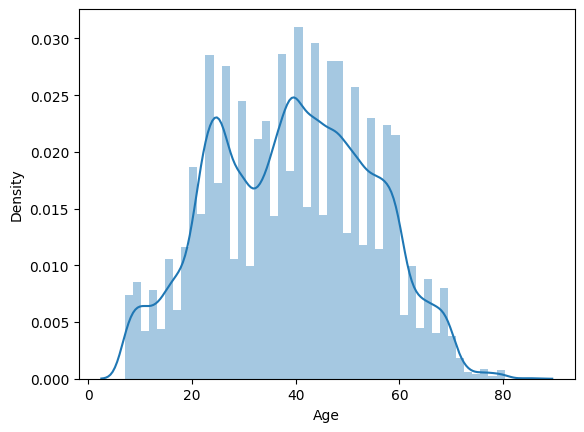

/var/folders/q5/4sgcvsds2rzbyzzy1kb4hgb00000gn/T/ipykernel_2624/3294237778.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_num[i])


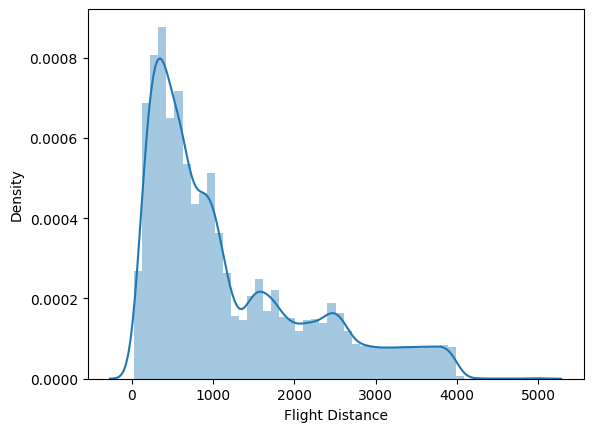

/var/folders/q5/4sgcvsds2rzbyzzy1kb4hgb00000gn/T/ipykernel_2624/3294237778.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_num[i])


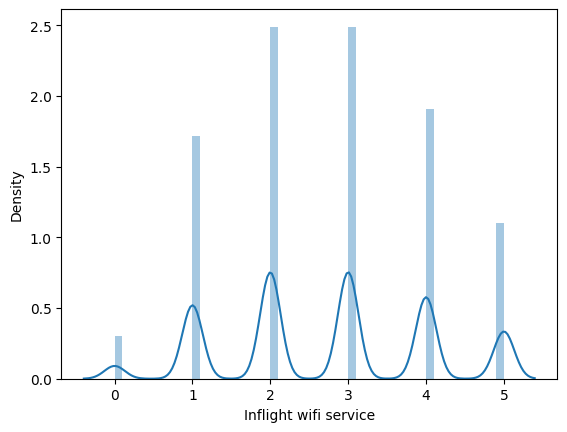

/var/folders/q5/4sgcvsds2rzbyzzy1kb4hgb00000gn/T/ipykernel_2624/3294237778.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_num[i])


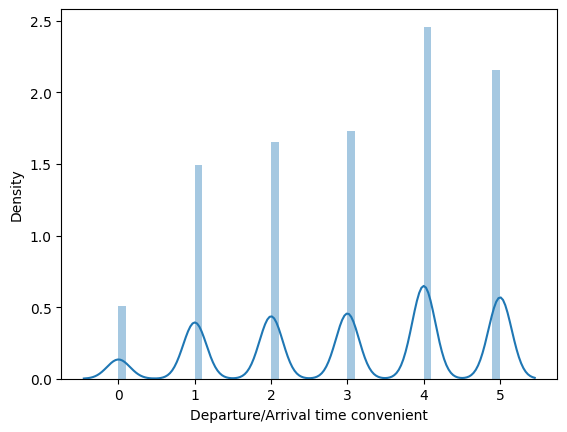

/var/folders/q5/4sgcvsds2rzbyzzy1kb4hgb00000gn/T/ipykernel_2624/3294237778.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_num[i])


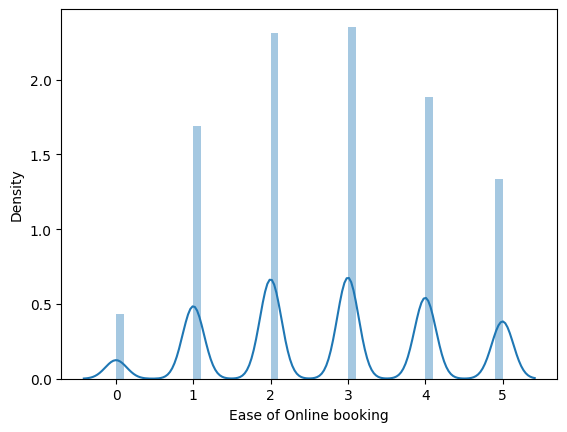

/var/folders/q5/4sgcvsds2rzbyzzy1kb4hgb00000gn/T/ipykernel_2624/3294237778.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_num[i])


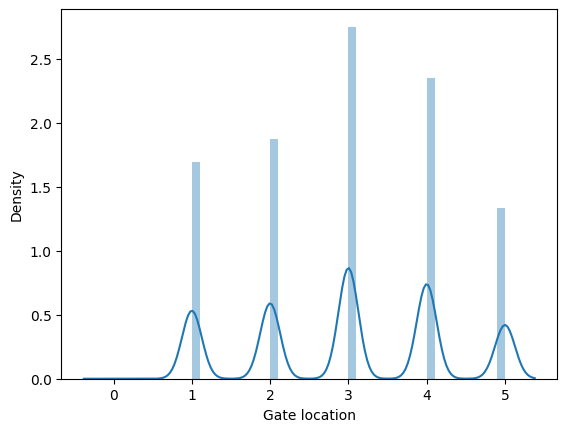

/var/folders/q5/4sgcvsds2rzbyzzy1kb4hgb00000gn/T/ipykernel_2624/3294237778.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_num[i])


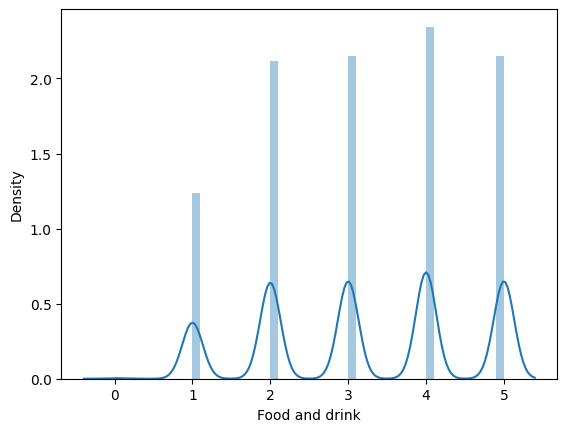

/var/folders/q5/4sgcvsds2rzbyzzy1kb4hgb00000gn/T/ipykernel_2624/3294237778.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_num[i])


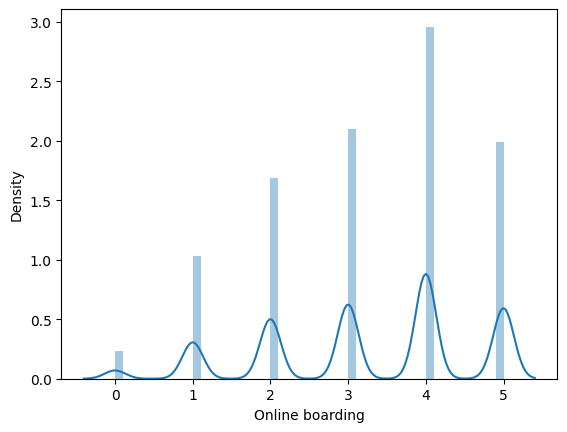

/var/folders/q5/4sgcvsds2rzbyzzy1kb4hgb00000gn/T/ipykernel_2624/3294237778.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_num[i])


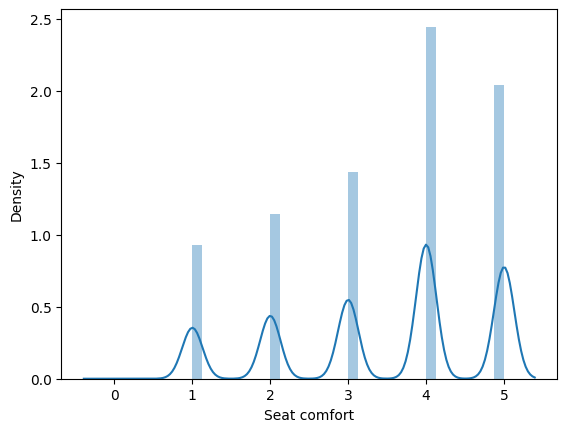

/var/folders/q5/4sgcvsds2rzbyzzy1kb4hgb00000gn/T/ipykernel_2624/3294237778.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_num[i])


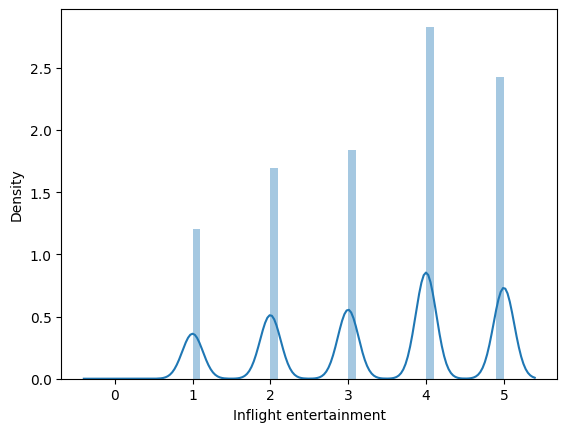

/var/folders/q5/4sgcvsds2rzbyzzy1kb4hgb00000gn/T/ipykernel_2624/3294237778.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_num[i])


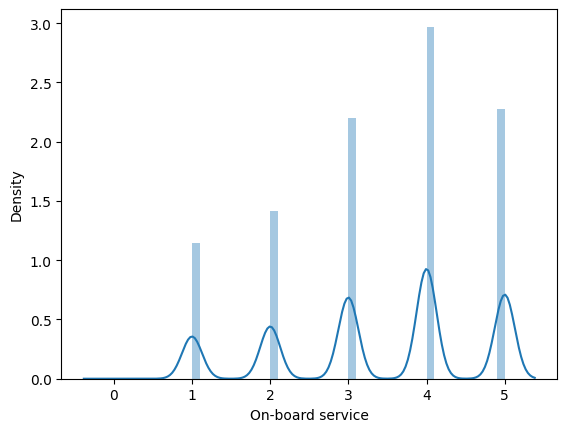

/var/folders/q5/4sgcvsds2rzbyzzy1kb4hgb00000gn/T/ipykernel_2624/3294237778.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_num[i])


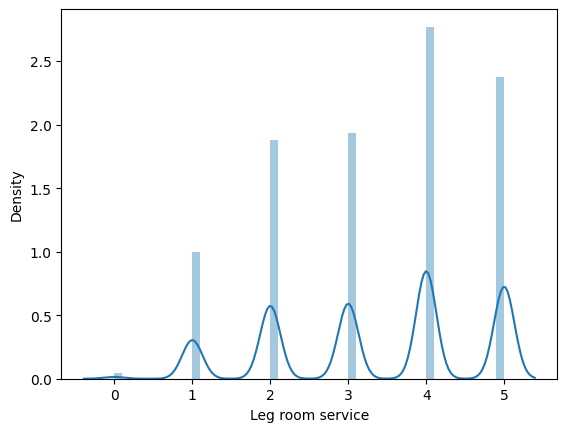

/var/folders/q5/4sgcvsds2rzbyzzy1kb4hgb00000gn/T/ipykernel_2624/3294237778.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_num[i])


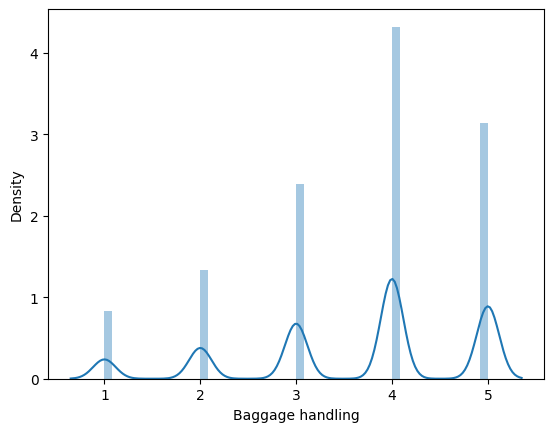

/var/folders/q5/4sgcvsds2rzbyzzy1kb4hgb00000gn/T/ipykernel_2624/3294237778.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_num[i])


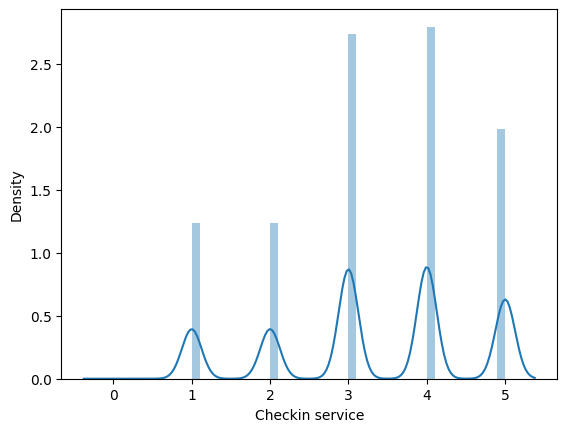

/var/folders/q5/4sgcvsds2rzbyzzy1kb4hgb00000gn/T/ipykernel_2624/3294237778.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_num[i])


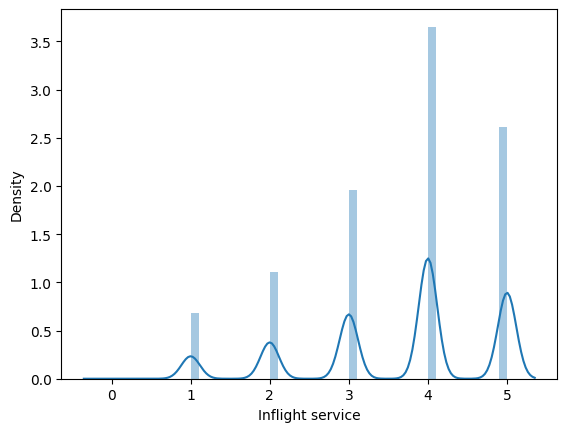

/var/folders/q5/4sgcvsds2rzbyzzy1kb4hgb00000gn/T/ipykernel_2624/3294237778.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_num[i])


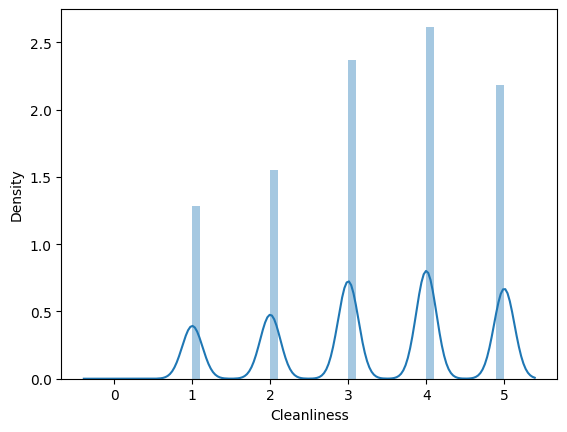

/var/folders/q5/4sgcvsds2rzbyzzy1kb4hgb00000gn/T/ipykernel_2624/3294237778.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_num[i])


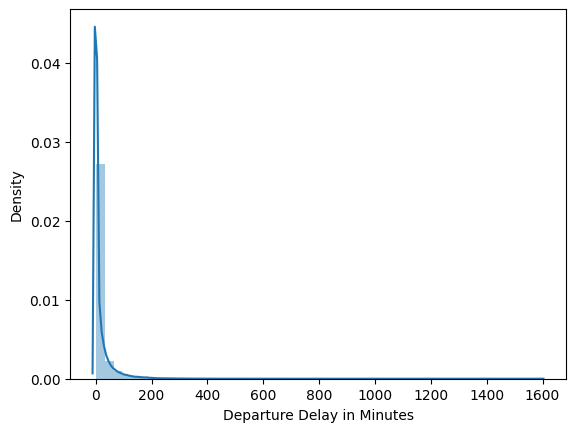

/var/folders/q5/4sgcvsds2rzbyzzy1kb4hgb00000gn/T/ipykernel_2624/3294237778.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_num[i])


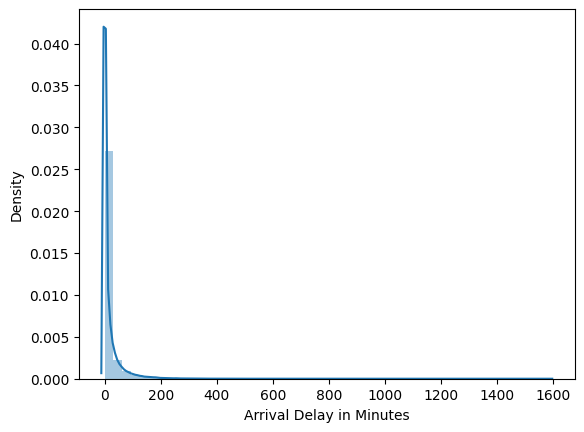

In [30]:
for i in x_num:
    plt.figure()
    sns.distplot(x_num[i])
    plt.show()

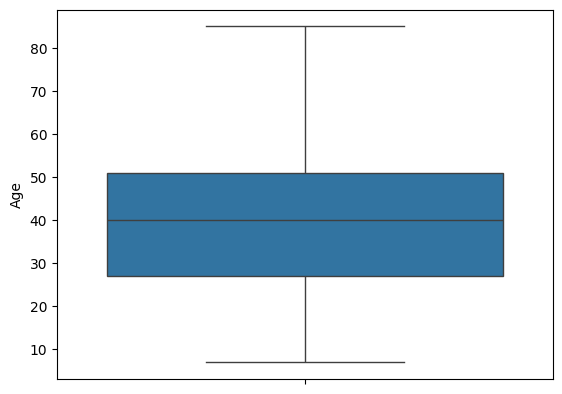

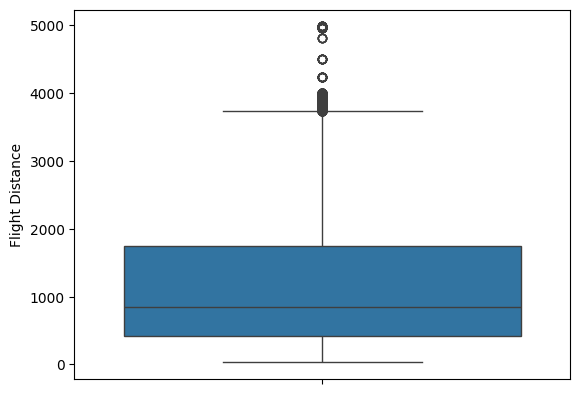

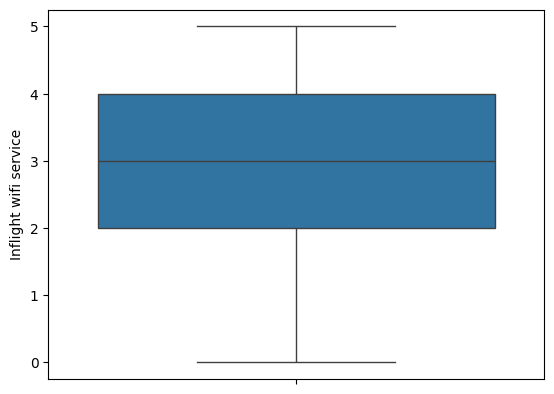

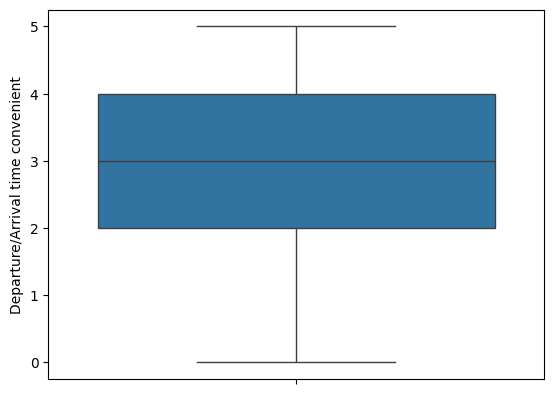

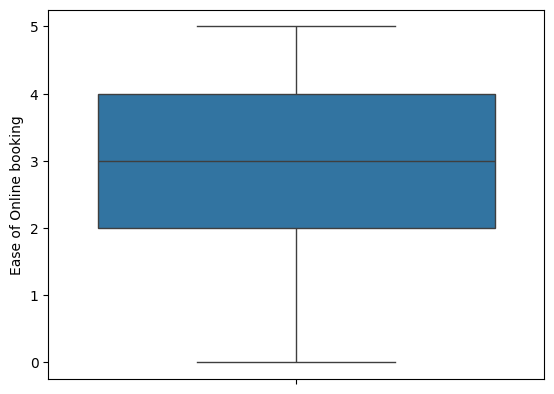

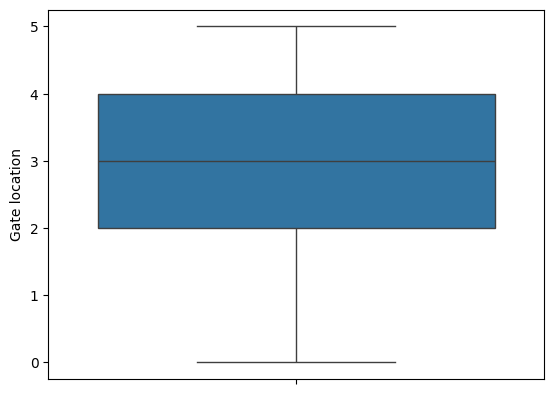

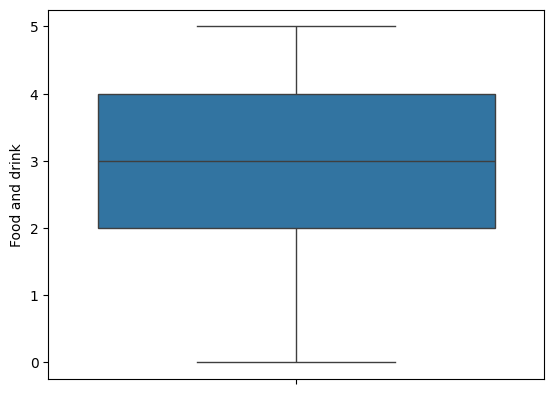

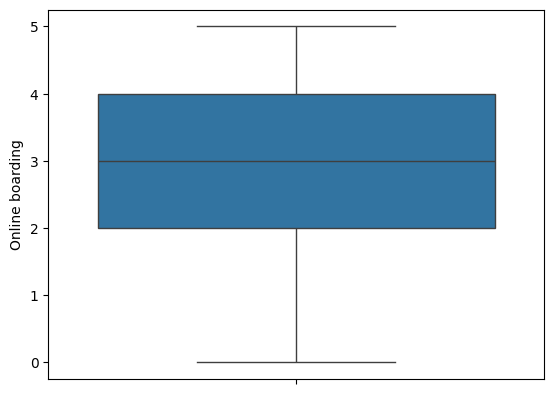

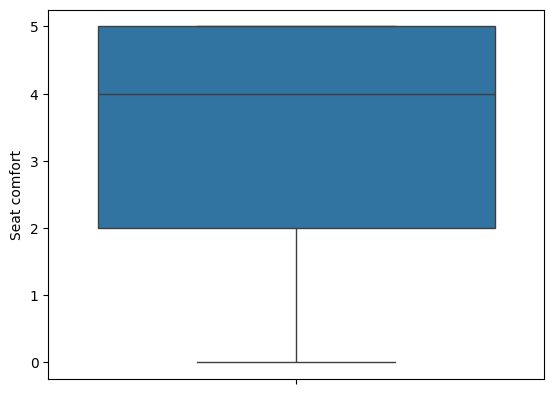

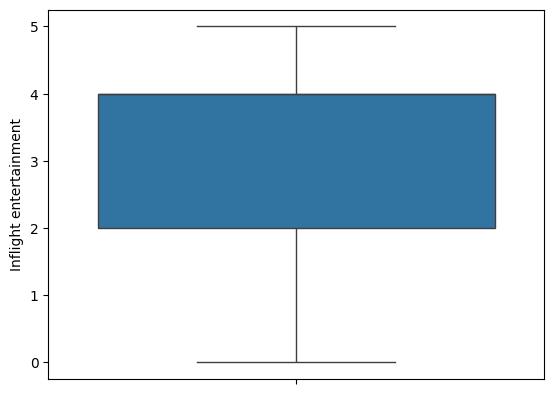

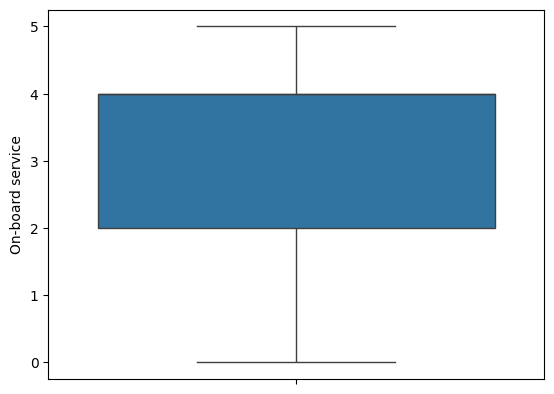

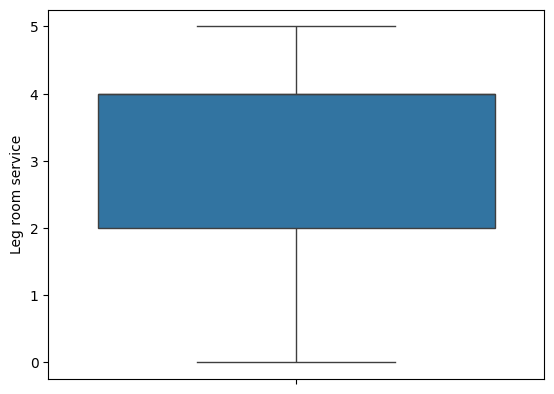

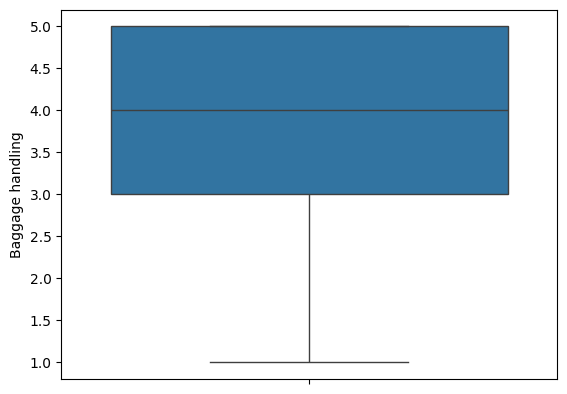

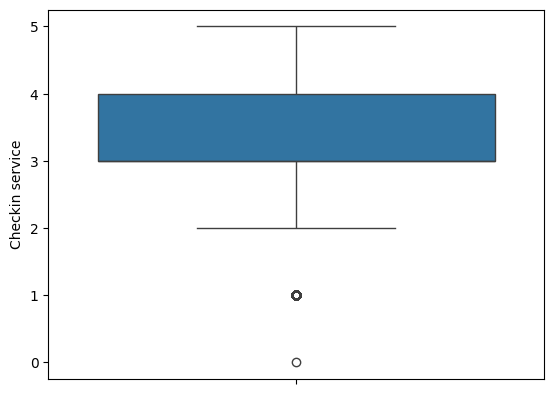

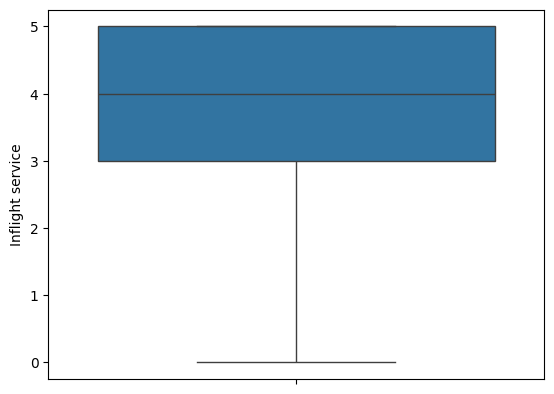

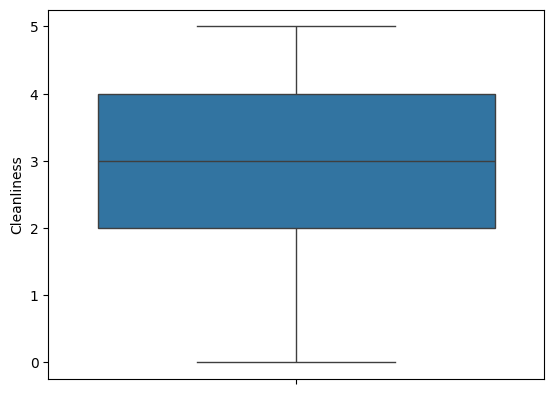

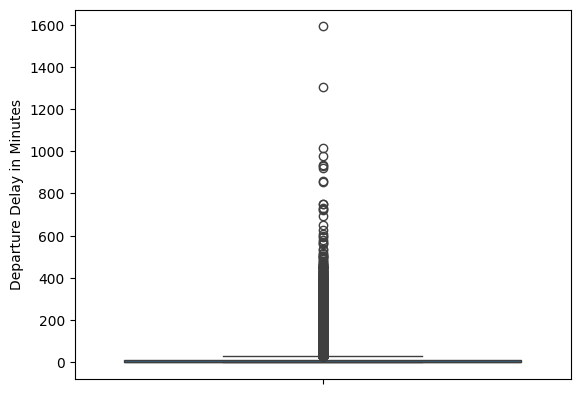

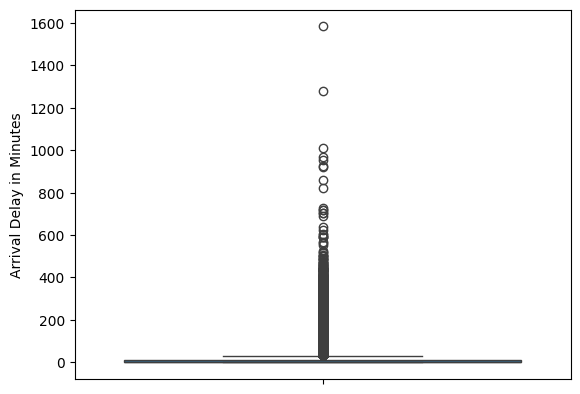

In [31]:
for i in x_num:
    plt.figure()
    sns.boxplot(x_num[i])
    plt.show()

In [32]:
x_num.describe(percentiles=[0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99])

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.640909
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,8.000000,101.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
5%,14.000000,175.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
10%,20.000000,236.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000
20%,25.000000,358.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,0.000000,0.000000
30%,30.000000,482.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000
40%,36.000000,630.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000


In [33]:
def outlier(x):
    x = x.clip(lower=x.quantile(0.01))
    x = x.clip(upper=x.quantile(0.86))
    return x

In [34]:
x_num_outlier_removed = x_num.apply(lambda x: outlier(x))

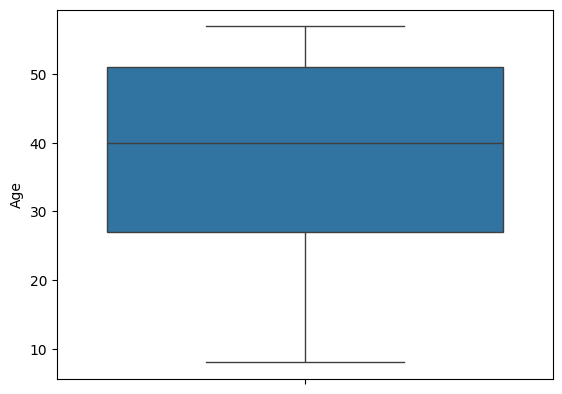

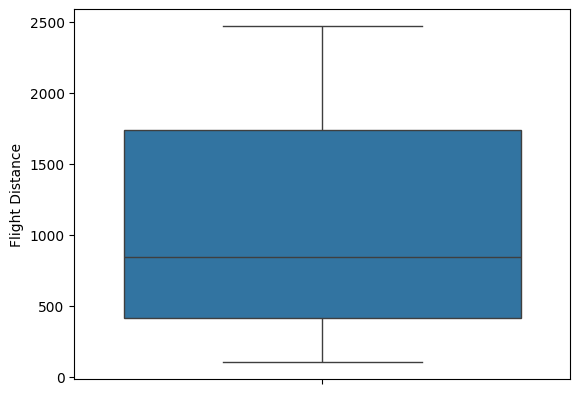

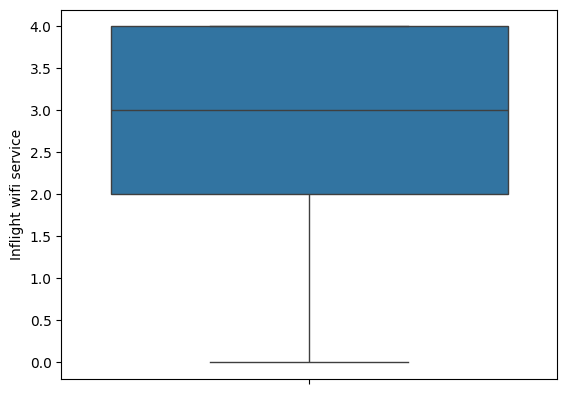

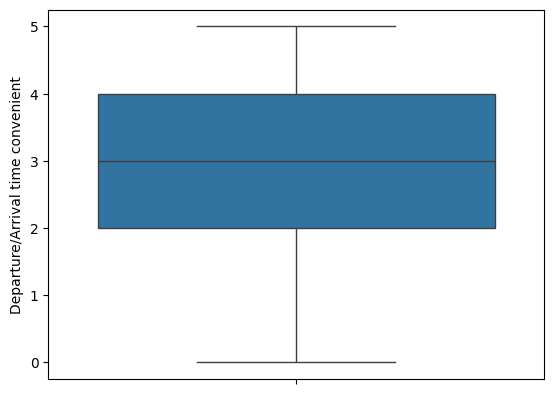

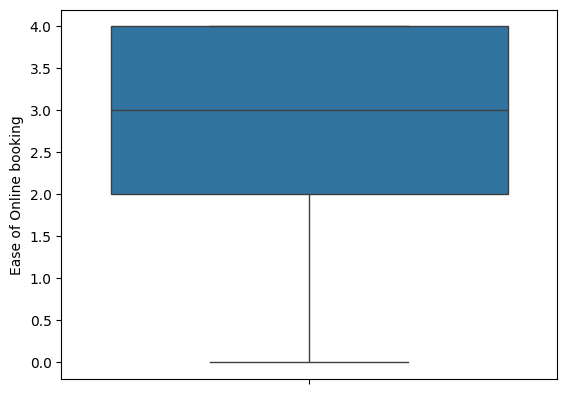

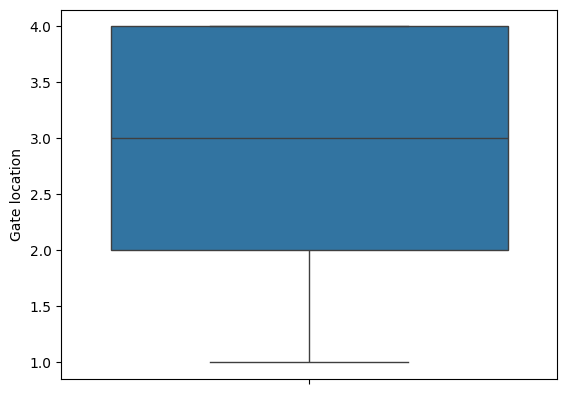

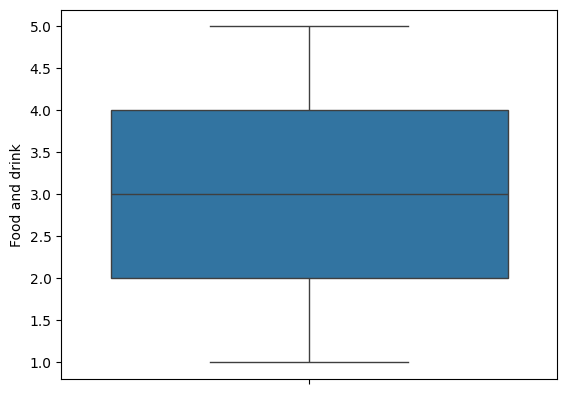

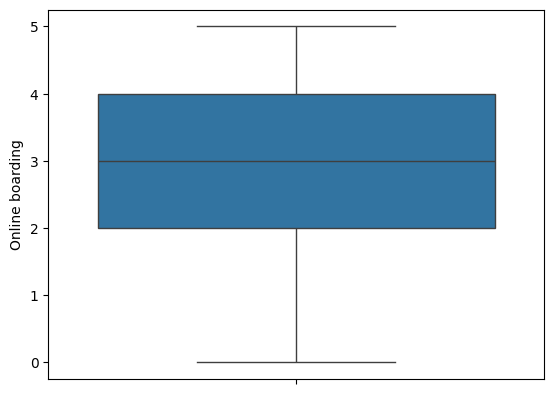

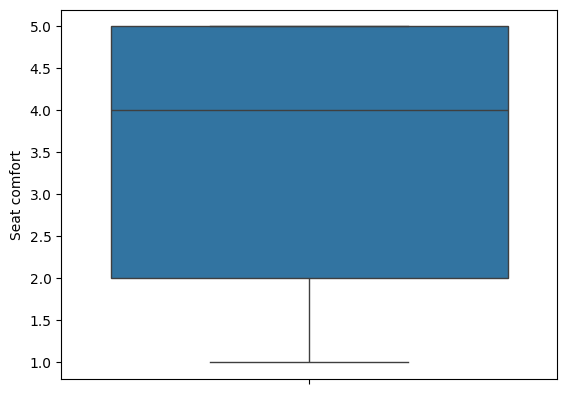

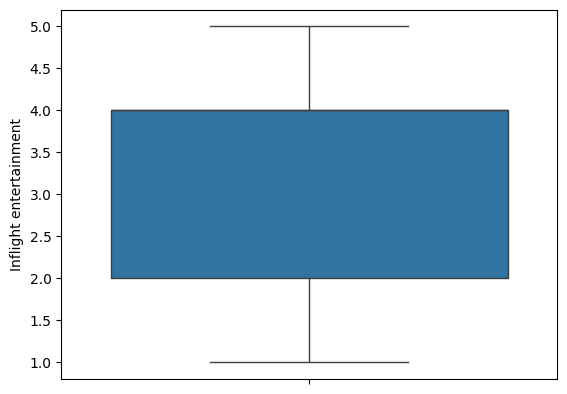

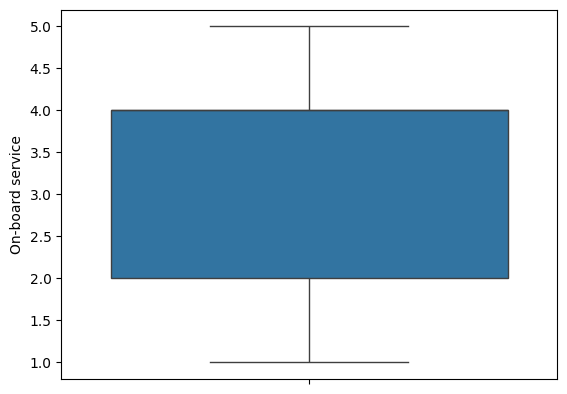

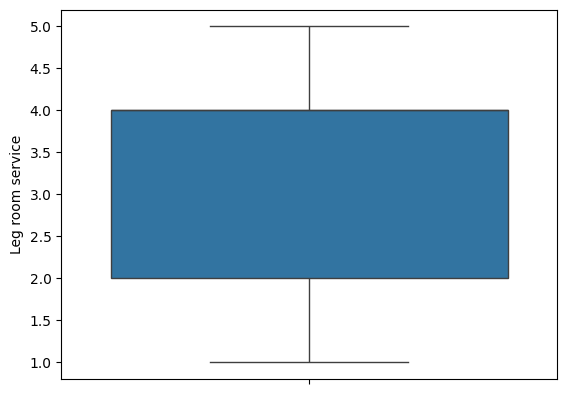

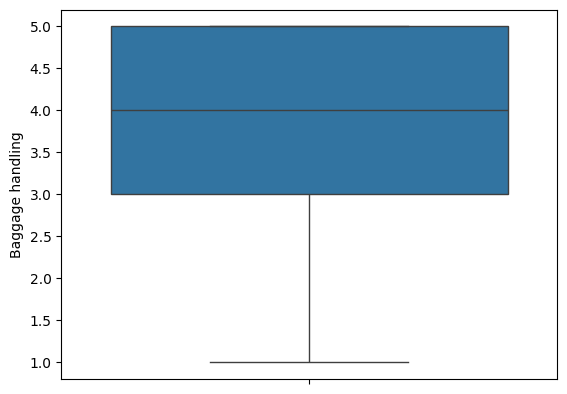

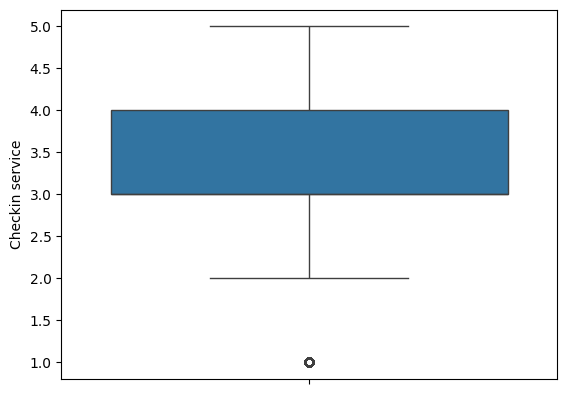

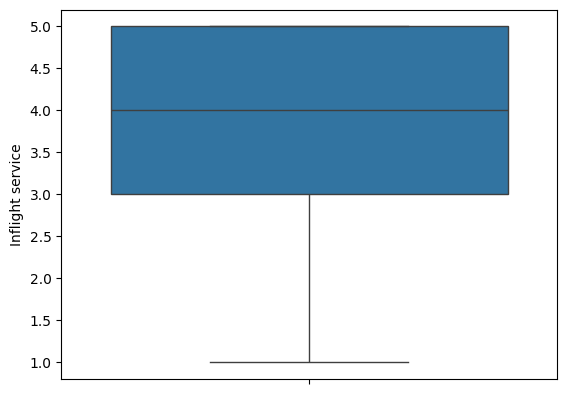

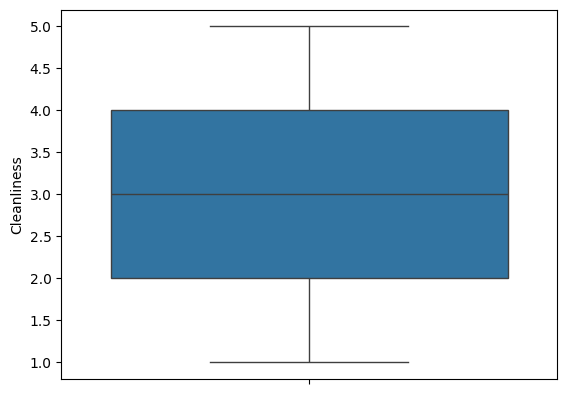

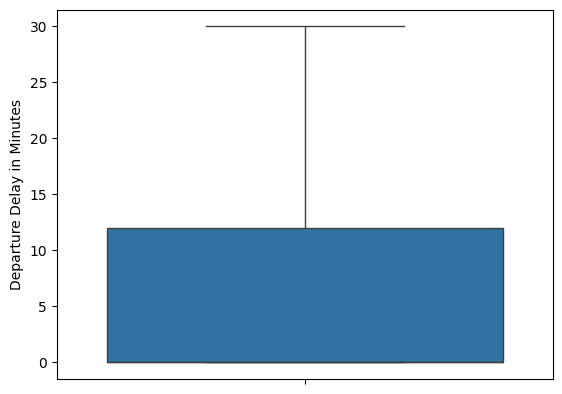

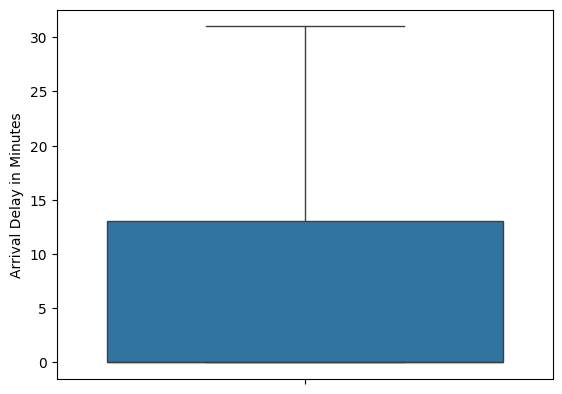

In [35]:
for i in x_num_outlier_removed:
    plt.figure()
    sns.boxplot(x_num_outlier_removed[i])
    plt.show()

In [36]:
X = pd.concat([x_cat_new,x_num_outlier_removed], axis=1)

In [37]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [38]:
from sklearn import set_config
set_config(display='diagram')

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [40]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [41]:
y_pred = rf.predict(x_test)

In [42]:
from sklearn import metrics

In [43]:
metrics.accuracy_score(y_test,y_pred)

0.9557769116019441

In [44]:
metrics.confusion_matrix(y_test,y_pred)

array([[11392,   321],
       [  598,  8470]])

In [196]:
x_cat

,Customer Type,Type of Travel,Class
0,Loyal Customer,Personal Travel,Eco Plus
1,disloyal Customer,Business travel,Business
2,Loyal Customer,Business travel,Business
3,Loyal Customer,Business travel,Business
4,Loyal Customer,Business travel,Business
...,...,...,...
103899,disloyal Customer,Business travel,Eco
103900,Loyal Customer,Business travel,Business
103901,disloyal Customer,Business travel,Business
103902,disloyal Customer,Business travel,Eco


In [200]:
# x_cat['Customer Type'].mean().sum()

In [197]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [205]:
new = pd.DataFrame()
for i in x_cat:
    le = LabelEncoder()
    new[i]=le.fit_transform(x_cat[i])

In [206]:
new

,Customer Type,Type of Travel,Class
0,0,1,2
1,1,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
103899,1,0,1
103900,0,0,0
103901,1,0,0
103902,1,0,1


In [214]:
on = OneHotEncoder()
n=on.fit_transform(x_cat)

In [215]:
n.toarray().shape

(103904, 7)

In [216]:
new1 = pd.DataFrame(n.toarray(), columns=on.get_feature_names_out(x_cat.columns))

In [217]:
new1

,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
103899,0.0,1.0,1.0,0.0,0.0,1.0,0.0
103900,1.0,0.0,1.0,0.0,1.0,0.0,0.0
103901,0.0,1.0,1.0,0.0,1.0,0.0,0.0
103902,0.0,1.0,1.0,0.0,0.0,1.0,0.0


# Using Pileline 

In [115]:
import pandas as pd
import numpy as np

from sklearn import set_config
set_config(display='diagram')

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [116]:
df = pd.read_csv('../data/train.csv')

In [117]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [118]:
df = df.drop(columns=['Unnamed: 0','id','Gender'], axis=1)

In [119]:
df.isnull().sum()

Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [120]:
df['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

In [121]:
df['target'] = df['satisfaction'].apply(lambda x: 1 if x=='satisfied' else 0)

In [122]:
df = df.drop(columns=['satisfaction'], axis=1)

In [123]:
x = df.drop('target', axis=1)
y = df['target']

In [124]:
# Define numerical and categorical columns
num_features = x.select_dtypes(exclude='object').columns
cat_features = x.select_dtypes(include='object').columns

In [125]:
# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', MinMaxScaler())
        ]), num_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), cat_features)
    ]
)

In [126]:
# Create a pipeline that combines preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.9635724941051922
Confusion Matrix:
[[11501   212]
 [  545  8523]]


In [131]:
y_train.value_counts()

target
0    47166
1    35957
Name: count, dtype: int64

In [252]:
test = pd.read_csv('./test.csv')

In [254]:
test

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [255]:
test['target']=pipeline.predict(test)

In [257]:
test.head(2)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,target
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,2,5,5,50,44.0,satisfied,1
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,3,4,5,0,0.0,satisfied,1


In [260]:
test['actual']= test['satisfaction'].apply(lambda x : 1 if x=='satisfied' else 0)

In [261]:
test.head(2)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,target,actual
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,2,5,5,50,44.0,satisfied,1,1
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,3,4,5,0,0.0,satisfied,1,1


In [262]:
y_test = test['actual']
y_pred = test['target']

In [263]:
metrics.accuracy_score(y_test,y_pred)

0.9628888204496459

In [264]:
metrics.confusion_matrix(y_test,y_pred)

array([[14259,   314],
       [  650, 10753]])

In [265]:
test.shape

(25976, 27)

In [266]:
14259+314+650+10753

25976

In [267]:
metrics.precision_score(y_test,y_pred)

0.971627360621668

In [268]:
metrics.accuracy_score(y_test,y_pred)

0.9628888204496459

In [269]:
metrics.f1_score(y_test,y_pred)

0.9570983533600357

In [1]:
import pickle

In [2]:
with open('../model/my_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [16]:
import pandas as pd

# Create DataFrame
x = pd.DataFrame([{
    'customer_type': 'Loyal Customer',
    'age': 34,
    'type_of_travel': 'Business',
    'class': 'Business',
    'flight_distance': 1234,
    'inflight_wifi_service': 3,
    'departure_arrival_convenience': 3,
    'ease_of_online_booking': 3,
    'gate_location': 3,
    'food_and_drink': 3,
    'online_boarding': 3,
    'seat_comfort': 3,
    'inflight_entertainment': 3,
    'onboard_service': 3,
    'leg_room_service': 3,
    'baggage_handling': 3,
    'checkin_service': 3,
    'inflight_service': 3,
    'cleanliness': 3,
    'departure_delay_in_minutes': 23,
    'arrival_delay_in_minutes': 23.0
}])

# Create a mapping of original column names to desired display names
column_mapping = {
    'departure_arrival_convenience': 'Departure/Arrival time convenient',
    'inflight_wifi_service': 'Inflight wifi service',
    'cleanliness': 'Cleanliness',
    'baggage_handling': 'Baggage handling',
    'flight_distance': 'Flight Distance',
    'leg_room_service': 'Leg room service',
    'departure_delay_in_minutes': 'Departure Delay in Minutes',
    'arrival_delay_in_minutes': 'Arrival Delay in Minutes',
    'ease_of_online_booking': 'Ease of Online booking',
    'checkin_service': 'Checkin service',
    'age': 'Age',
    'onboard_service': 'On-board service',
    'online_boarding': 'Online boarding',
    'gate_location': 'Gate location',
    'food_and_drink': 'Food and drink',
    'customer_type': 'Customer Type',
    'type_of_travel': 'Type of Travel',
    'inflight_service': 'Inflight service',
    'seat_comfort': 'Seat comfort',
    'inflight_entertainment': 'Inflight entertainment',
    'class': 'Class'
}

# Rename the columns using the mapping
x.rename(columns=column_mapping, inplace=True)

# Specify the desired order of columns
column_order = [
    'Departure/Arrival time convenient', 'Inflight wifi service', 'Cleanliness',
    'Baggage handling', 'Flight Distance', 'Leg room service',
    'Departure Delay in Minutes', 'Arrival Delay in Minutes',
    'Ease of Online booking', 'Checkin service', 'Age', 'On-board service',
    'Online boarding', 'Gate location', 'Food and drink', 'Customer Type',
    'Type of Travel', 'Inflight service', 'Seat comfort', 'Inflight entertainment',
    'Class'
]

# Rearrange the DataFrame
x = x[column_order]

# Print the DataFrame
print(x)


   Departure/Arrival time convenient  Inflight wifi service  Cleanliness  \
0                                  3                      3            3   

   Baggage handling  Flight Distance  Leg room service  \
0                 3             1234                 3   

   Departure Delay in Minutes  Arrival Delay in Minutes  \
0                          23                      23.0   

   Ease of Online booking  Checkin service  ...  On-board service  \
0                       3                3  ...                 3   

   Online boarding  Gate location  Food and drink   Customer Type  \
0                3              3               3  Loyal Customer   

  Type of Travel Inflight service  Seat comfort  Inflight entertainment  \
0       Business                3             3                       3   

      Class  
0  Business  

[1 rows x 21 columns]


In [17]:
x

,Departure/Arrival time convenient,Inflight wifi service,Cleanliness,Baggage handling,Flight Distance,Leg room service,Departure Delay in Minutes,Arrival Delay in Minutes,Ease of Online booking,Checkin service,...,On-board service,Online boarding,Gate location,Food and drink,Customer Type,Type of Travel,Inflight service,Seat comfort,Inflight entertainment,Class
0,3,3,3,3,1234,3,23,23.0,3,3,...,3,3,3,3,Loyal Customer,Business,3,3,3,Business


In [19]:
z = model.predict(x)
z

array([0])

In [68]:
x_train.dtypes

Customer Type_disloyal Customer         bool
Type of Travel_Personal Travel          bool
Class_Eco                               bool
Class_Eco Plus                          bool
Age                                    int64
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj